# Time Series data 

#### what is time series?
A time series is just data points collected over time, usually at equally spaced intervals (daily stock prices, monthly inflation, quarterly GDP).
- In finance, stock prices are the most common example.
- Key challenge: values are dependent on past values (yesterday’s price matters for today).

Key Concepts in Time Series

- Trend – overall direction (upward / downward).

- Seasonality – repeating patterns (e.g., holiday spending spikes).

- Stationarity – statistical properties (mean, variance) don’t change over time.

- Autocorrelation – how related today’s value is to past values.


The market data is a time series data. We are going to look at some key data points and their indication for the stock market. 

 - **LAG**: Yesterday's Price helps explain Today's
 - **Rolling Average**: smooths out the noise in volatile data to reveal a trend
 - **Autocorrelation**: How related was Today's data to yesterdays data 

/var/folders/kr/gft6qzsx1pd7p6nqyq9g3wd00000gn/T/ipykernel_10609/176047285.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("MSFT", period="6mo", interval="1d")
[*********************100%***********************]  1 of 1 completed


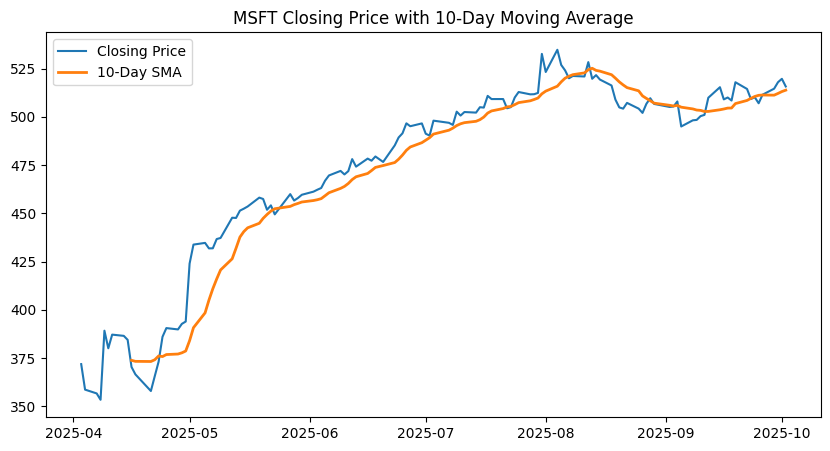

In [4]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

data = yf.download("MSFT", period="6mo", interval="1d")
data["SMA_10"] = data['Close'].rolling(window=10).mean()

# Plot Closing Price vs Moving Average
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['SMA_10'], label='10-Day SMA', linewidth=2)
plt.title("MSFT Closing Price with 10-Day Moving Average")
plt.legend()
plt.show()

#### What is Stationarity ?
A stationary time series is one whose properties don’t change over time.

That means:

- Constant mean → it doesn’t drift upward or downward.

- Constant variance → volatility doesn’t keep changing.

- Constant autocorrelation structure → relationship between today and yesterday is stable.

Non-stationary : like stock prices and Stationary : like stock returns (percentage change)

We care about the stationarity because most ML models assume the data is stationary. because if it is not stationary then this happens : if trends stay up forever, a model learns that values stay up. if varience keeps changing, your confidence intervals are meaningless. If autocorrelations shift, yesterday's pattern doesn't help predict tomorrow. 

Ex: Imagine you want to predict next month’s stock price.

If the series is non-stationary (prices), your model just sees “going up, going up…” → poor predictions.

If you transform it into stationary (returns), your model can now learn real dependencies.

So now we know we need the data to be stationary to make predictions, first lets turn stock prices -> returns 
- We use differencing : y<sub>t</sub> - y<sub>t-1</sub> [removes trends]
- log transform: y'<sub>t</sub> = log(y<sub>t</sub>) [helps stabilize the varience]
- Detrending: explicitly remove the trend component 

Hence, we now know that ADF Testing makes sense, it checks whether your series has unit root(i.e is it a random walk/non-stationary). If ADF says “non-stationary,” you usually apply differencing or transformations before modeling.

📊 So this bring us to the question : Are Stock Prices Always Non-Stationary?

Yes — raw stock prices are almost always non-stationary.

- They have a trend (long-term growth of companies).

- Their mean changes (Apple in 2010 was ~$30, in 2025 it’s ~$170).

- Their variance changes (when markets are volatile, swings are bigger).

- They often behave like a random walk (today’s price = yesterday’s price + noise).

That’s why if you run an ADF test on raw prices, you usually get:

- p-value > 0.05 → fail to reject H₀ → non-stationary.

That why turn them into something stationary-ish :

- Returns : R<sub>t</sub> = p<sub>t</sub> - p<sub>t-1</sub> / p<sub>t-1</sub>
- log returns : R<sub>t</sub> = log(P<sub>t</sub>) - log(p<sub>t-1</sub>)
- differencing : delta(p<sub>t</sub>) = P<sub>t</sub> - p<sub>t-1</sub>

#### Why Stationarity Matters?

Most statistical models (like ARIMA) assume the data is stationary:

- Mean, variance, covariance don’t change over time.

- Stock returns are often more stationary than stock prices.

👉 If the data is not stationary, predictions can become misleading.

For this we apply **Augmented Dickey-Fuller (ADF) Test**

The ADF test helps check stationarity.

- Null hypothesis (H₀): Series is non-stationary.

- Alternative (H₁): Series is stationary.

/var/folders/kr/gft6qzsx1pd7p6nqyq9g3wd00000gn/T/ipykernel_10609/2942098065.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", period="5y", interval="1d")
[*********************100%***********************]  1 of 1 completed


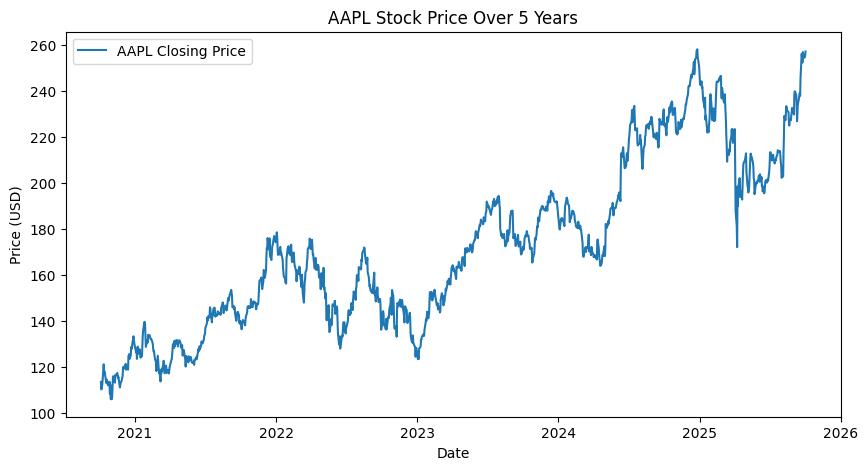

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt 

data = yf.download("AAPL", period="5y", interval="1d")
prices = data['Close']

plt.figure(figsize=(10,5))
plt.plot(prices, label='AAPL Closing Price')
plt.title("AAPL Stock Price Over 5 Years")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [ ]:
# lets test if the stock prices are stationary or not 
from statsmodels.tsa.stattools import adfuller

result = adfuller(prices.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])

if result[1] < 0.05:
    print("Reject the null hypothesis. Hence results are statistically significant. The series is stationary.")
else:
    print("Fail to reject null hypothesis. The series is non-stationary.")


ADF Statistic: -1.0068552832919309
p-value: 0.75075578940862
Fail to reject null hypothesis. The series is non-stationary.


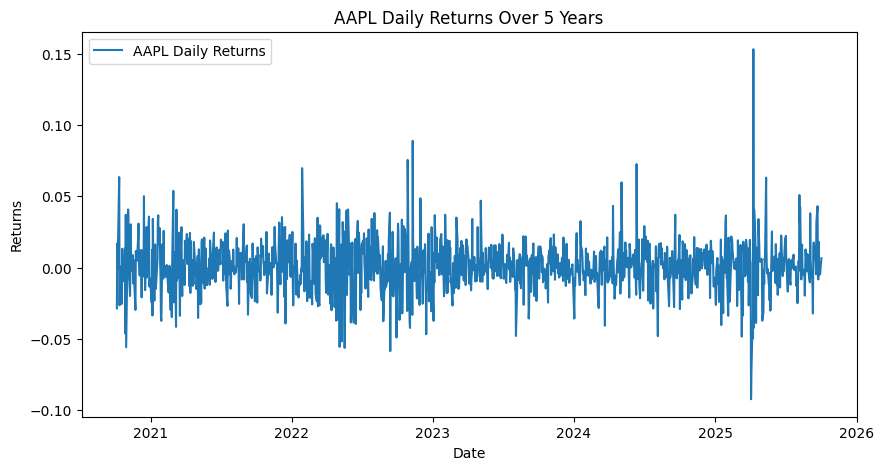

ADF Statistic: -35.4358590842529
p-value: 0.0
Reject the null hypothesis. Hence results are statistically significant. The series is stationary.


In [10]:
# convert prices to returns 
returns = prices.pct_change().dropna()

plt.figure(figsize=(10,5))
plt.plot(returns, label='AAPL Daily Returns')
plt.title("AAPL Daily Returns Over 5 Years")
plt.xlabel("Date")
plt.ylabel("Returns")
plt.legend()
plt.show()

result = adfuller(returns)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("Reject the null hypothesis. Hence results are statistically significant. The series is stationary.")
else:
    print("Fail to reject null hypothesis. The series is non-stationary.")

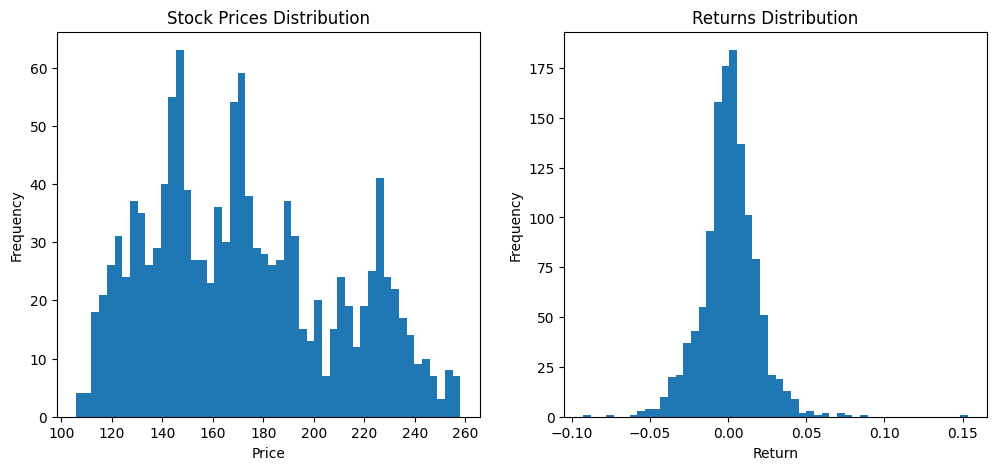

In [15]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
prices['AAPL'].plot(kind="hist", bins=50, title="Stock Prices Distribution")
plt.xlabel("Price")

plt.subplot(1,2,2)
returns['AAPL'].plot(kind="hist", bins=50, title="Returns Distribution")
plt.xlabel("Return")
plt.show()


#### What is Autocorrelation?

Autocorrelation (or serial correlation) measures how a time series is related to a lagged version of itself.

> **NOTE**: Does the past value of a stock tell me anything about its present value?"

So lets start with some know terms :
1. Correlation usually measures the relationship between two different variables (e.g., stock returns vs. interest rates).

2. Autocorrelation measures the relationship between the same variable across time (e.g., stock price today vs. stock price yesterday).

##### 🔹 Intuition with Stock Prices

If autocorrelation is high at lag 1:
Today’s stock price is strongly related to yesterday’s stock price.

If autocorrelation is low:
Past prices don’t really help predict today’s price.

In financial returns (not raw prices), autocorrelation tends to be close to zero, since markets are efficient.

##### 🔹 Formula

Numerator: covariance between current and lagged values

Denominator: variance (to normalize)

##### 🔹 Why Autocorrelation Matters

Detecting Stationarity – If autocorrelations die off quickly, the series may be stationary. If they persist, it’s probably non-stationary.

Model Selection – Autoregressive models (AR, ARIMA, etc.) rely on autocorrelation to decide lag length.

Market Insight – If returns have strong autocorrelation, it implies predictability, which can be exploited (though in practice, returns usually don’t).

#### ⚡ Example:

Stock prices: show strong autocorrelation (since prices trend).

Stock returns: usually little autocorrelation (close to white noise).

<Figure size 1200x500 with 0 Axes>

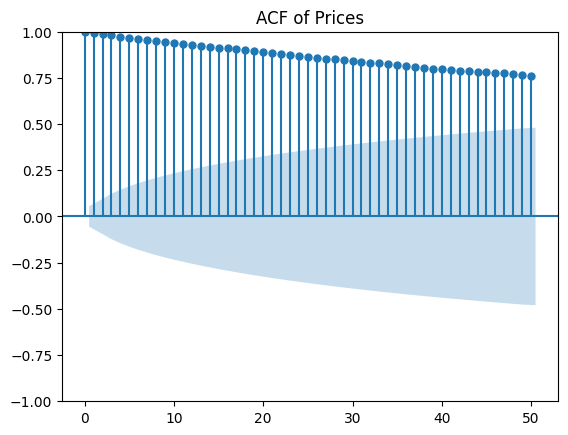

<Figure size 1200x500 with 0 Axes>

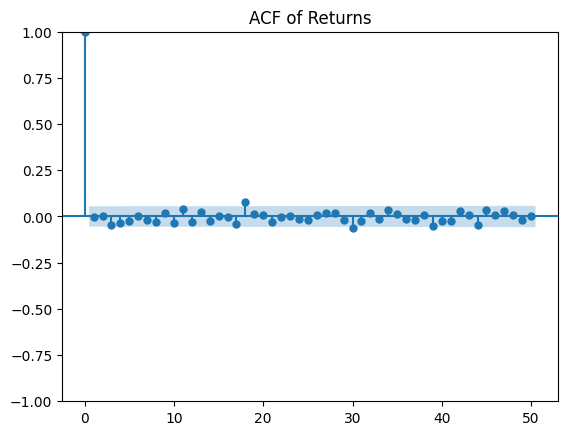

Prices ACF decays slowly → non-stationary.
 Returns ACF drops quickly → stationary.


In [17]:
# Lets check autocorrelation of prices and returns
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,5))
plot_acf(prices.dropna(), lags=50, title="ACF of Prices")
plt.show()

plt.figure(figsize=(12,5))
plot_acf(returns.dropna(), lags=50, title="ACF of Returns")
plt.show()

print("Prices ACF decays slowly → non-stationary.")
print(" Returns ACF drops quickly → stationary.")

mini time series lab for finance:

- Moving averages → trend detection

- ADF test → check stationarity

- ACF plots → see lag relationships

# Insights

- Stock prices are non-stationary (as expected).

- Returns are stationary, so they can be modeled.

- ACF shows weak autocorrelation, suggesting limited predictability.

- SMA smooths out volatility, useful for trend following.